In [1]:
# Import libraries
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import matplotlib.pyplot as plt
import seaborn as sns


In [12]:
# Load the dataset
url = '/content/dataset.csv'  # Replace with actual URL if available
df = pd.read_csv(url)

# If you upload manually, use:
# df = pd.read_csv('/content/lung_cancer.csv')

# View data
df.head()


,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN,LUNG_CANCER
0,M,65,1,1,1,2,2,1,2,2,2,2,2,2,1,NO
1,F,55,1,2,2,1,1,2,2,2,1,1,1,2,2,NO
2,F,78,2,2,1,1,1,2,1,2,1,1,2,1,1,YES
3,M,60,2,1,1,1,2,1,2,1,1,2,1,2,2,YES
4,F,80,1,1,2,1,1,2,1,2,1,1,1,1,2,NO


In [14]:
# Separate features and target
X = df.drop('LUNG_CANCER', axis=1)
y = df['LUNG_CANCER']


In [15]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Encode categorical columns if needed (e.g., GENDER, SMOKING, etc.)
le = LabelEncoder()
for col in X.columns:
    if X[col].dtype == 'object':
        X[col] = le.fit_transform(X[col])

# Scale numeric features (optional but recommended)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Now split and continue with model training
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y,
                                                    test_size=0.2,
                                                    random_state=42,
                                                    stratify=y)


In [17]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

Accuracy: 0.555

Classification Report:
               precision    recall  f1-score   support

           0       0.55      0.57      0.56       296
           1       0.56      0.54      0.55       304

    accuracy                           0.56       600
   macro avg       0.56      0.56      0.55       600
weighted avg       0.56      0.56      0.55       600



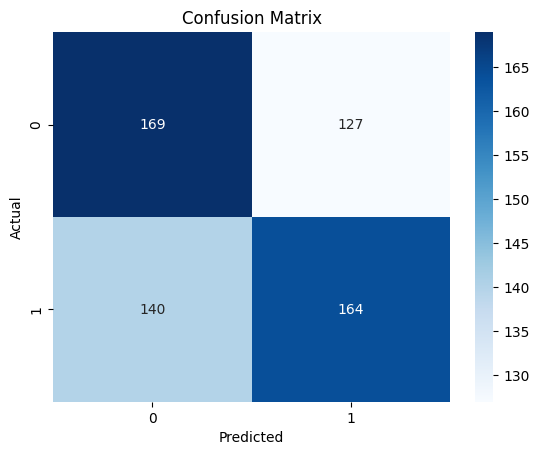

In [18]:
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix heatmap
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
